<a href="https://colab.research.google.com/github/adityasukhwani/DL_Lab/blob/master/AdityaSukhwani_200968262_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
https://www.tensorflow.org/guide/keras/functional

In [ ]:
# Fetching the dataset from sklearn.datasets and splitting and storing it in X and y
from sklearn.datasets import fetch_california_housing
X,y=fetch_california_housing(return_X_y=True)

In [ ]:
# Normalizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
# Splitting the dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(16512, 8)

Using the sequential API to build a regression MLP with 1 hidden layer

In [ ]:
seq_model=keras.models.Sequential([
    keras.Input(shape=X_train.shape[1]),
    keras.layers.Dense(30, activation="ReLU"),
    keras.layers.Dense(1,activation="linear")
])

In [ ]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Complinig the sequential model created taking the loss function as MSE and optimizer as SGD and for evaluation using the root mean square error
seq_model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.001),metrics=[keras.metrics.RootMeanSquaredError()])

In [ ]:
# fitting the dataset on the model
history=seq_model.fit(X_train,y_train, epochs=20,validation_split=0.2)

Epoch 1/20
413/413 [==============================] - 2s 3ms/step - loss: 1.9810 - root_mean_squared_error: 1.4075 - val_loss: 0.8773 - val_root_mean_squared_error: 0.9367
Epoch 2/20
413/413 [==============================] - 1s 3ms/step - loss: 0.7891 - root_mean_squared_error: 0.8883 - val_loss: 0.7718 - val_root_mean_squared_error: 0.8785
Epoch 3/20
413/413 [==============================] - 1s 3ms/step - loss: 0.7182 - root_mean_squared_error: 0.8475 - val_loss: 0.7262 - val_root_mean_squared_error: 0.8522
Epoch 4/20
413/413 [==============================] - 1s 3ms/step - loss: 0.6770 - root_mean_squared_error: 0.8228 - val_loss: 0.6891 - val_root_mean_squared_error: 0.8301
Epoch 5/20
413/413 [==============================] - 1s 3ms/step - loss: 0.6432 - root_mean_squared_error: 0.8020 - val_loss: 0.6599 - val_root_mean_squared_error: 0.8124
Epoch 6/20
413/413 [==============================] - 2s 4ms/step - loss: 0.6163 - root_mean_squared_error: 0.7851 - val_loss: 0.6316 - val_

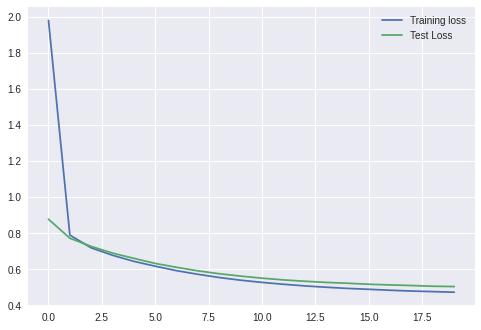

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(history.epoch,history.history['loss'])
plt.plot(history.epoch,history.history['val_loss'])
plt.legend(["Training loss","Test Loss"])

In [ ]:
# Evaluating the model on the test data
seq_model.evaluate(X_test,y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.5006 - root_mean_squared_error: 0.7076


[0.5006422400474548, 0.7075607776641846]

As we can see that the loss is around 0.50 onn the test data which is fairly good and the root mean sqare error on the test data is 0.70.
We can see that the loss and rmse is decreasing as the epochs increases which shows that the model is learning well and trying to fit perfectly 

Functional API

In [ ]:
# Passing 0 to 4 features as InputA
input1=keras.Input((5,),name="Input1")
#Passing 2 to 7 features as InputB
input2=keras.Input((6,),name="Input2")
#Creating the 2 hidden layers
hidden_1=keras.layers.Dense(30,activation="ReLU",name="Hidden1")(input2)
hidden_2=keras.layers.Dense(30,activation="ReLU",name="Hidden2")(hidden_1)
#Concatenating the 2 layers
concat=keras.layers.concatenate([hidden_2,input1])

output=keras.layers.Dense(1,activation="linear",name="output")(concat)

In [ ]:
func_model=keras.Model(inputs=[input1,input2],outputs=[output])

In [ ]:
# Splitting the dataset to pass as input to function
x1=np.hsplit(X_train,np.array([5,8]))[0]
x2=np.hsplit(X_train,np.array([2,8]))[1]


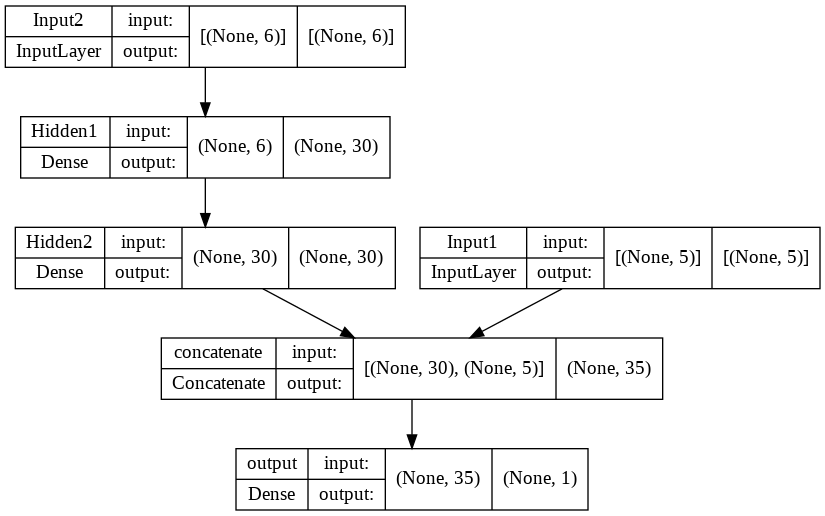

In [ ]:
keras.utils.plot_model(func_model, show_shapes=True)

In [ ]:
func_model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.001),metrics=[keras.metrics.RootMeanSquaredError()])

In [ ]:
history_func=func_model.fit([x1,x2],y_train, epochs=20, validation_split=0.2)

Epoch 1/20
413/413 [==============================] - 2s 3ms/step - loss: 1.6426 - root_mean_squared_error: 1.2817 - val_loss: 0.8458 - val_root_mean_squared_error: 0.9197
Epoch 2/20
413/413 [==============================] - 1s 3ms/step - loss: 0.7581 - root_mean_squared_error: 0.8707 - val_loss: 0.7034 - val_root_mean_squared_error: 0.8387
Epoch 3/20
413/413 [==============================] - 1s 3ms/step - loss: 0.6465 - root_mean_squared_error: 0.8040 - val_loss: 0.6528 - val_root_mean_squared_error: 0.8080
Epoch 4/20
413/413 [==============================] - 1s 3ms/step - loss: 0.6083 - root_mean_squared_error: 0.7799 - val_loss: 0.6197 - val_root_mean_squared_error: 0.7872
Epoch 5/20
413/413 [==============================] - 1s 3ms/step - loss: 0.5815 - root_mean_squared_error: 0.7625 - val_loss: 0.5955 - val_root_mean_squared_error: 0.7717
Epoch 6/20
413/413 [==============================] - 1s 3ms/step - loss: 0.5605 - root_mean_squared_error: 0.7487 - val_loss: 0.5758 - val_

In [ ]:
x1_test=np.hsplit(X_test,np.array([5,8]))[0]
x2_test=np.hsplit(X_test,np.array([2,8]))[1]
func_model.evaluate([x1_test,x2_test], y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.4726 - root_mean_squared_error: 0.6874


[0.4725596308708191, 0.6874297261238098]

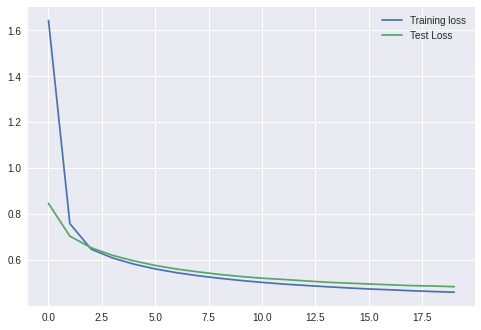

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(history.epoch,history_func.history['loss'])
plt.plot(history.epoch,history_func.history['val_loss'])
plt.legend(["Training loss","Test Loss"])

We can see that the wide and deep neural network model has better loss and rmse score than sequential model and if we keep running both the model for more epohs then the wide and deep NN model will make better predictions